## 📌 Data Preprocessing & Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('CleanFinalData.csv')

In [3]:
df.shape

(294536, 16)

In [4]:
df.columns

Index(['date', 'area_name', 'road_name', 'traffic_volume', 'average_speed',
       'travel_time_index', 'congestion_level', 'road_capacity_utilization',
       'incident_reports', 'environmental_impact', 'public_transport_usage',
       'traffic_signal_compliance', 'parking_usage',
       'pedestrian_cyclist_count', 'weather_conditions',
       'roadwork_construction'],
      dtype='object')

In [5]:
df.isnull().sum()

date                         0
area_name                    0
road_name                    0
traffic_volume               0
average_speed                0
travel_time_index            0
congestion_level             0
road_capacity_utilization    0
incident_reports             0
environmental_impact         0
public_transport_usage       0
traffic_signal_compliance    0
parking_usage                0
pedestrian_cyclist_count     0
weather_conditions           0
roadwork_construction        0
dtype: int64

In [6]:
df.dtypes

date                          object
area_name                     object
road_name                     object
traffic_volume                 int64
average_speed                float64
travel_time_index            float64
congestion_level             float64
road_capacity_utilization    float64
incident_reports               int64
environmental_impact         float64
public_transport_usage       float64
traffic_signal_compliance    float64
parking_usage                float64
pedestrian_cyclist_count     float64
weather_conditions            object
roadwork_construction         object
dtype: object

In [7]:
df.shape

(294536, 16)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [11]:
display(df.describe())
display(df.describe(include=['object']))

,traffic_volume,average_speed,travel_time_index,congestion_level,road_capacity_utilization,incident_reports,environmental_impact,public_transport_usage,traffic_signal_compliance,parking_usage,pedestrian_cyclist_count,year,month,day
count,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000,294536.000000
mean,22583.156531,38.164683,2.586323,59.184488,58.732619,5.666798,77.138631,6.788549,83.543748,37.980223,2055.519314,2022.849849,5.976882,15.620593
std,17149.586653,13.717873,1.049818,40.512428,27.779773,4.000959,60.736399,17.303495,9.096709,31.604507,1902.537340,0.770777,3.339175,8.820178
min,500.000000,7.144846,1.000039,0.000000,0.400006,0.000000,20.001206,0.100011,60.000000,0.200006,50.000000,2022.000000,1.000000,1.000000
25%,8912.000000,28.065425,1.890000,35.948497,48.127346,2.000000,51.970000,0.416963,76.800438,0.677214,374.000000,2022.000000,3.000000,8.000000
50%,20149.000000,37.971341,2.500000,54.117049,63.230000,5.000000,65.850247,0.556511,84.130000,48.275000,1358.000000,2023.000000,6.000000,16.000000
75%,31956.250000,48.065283,3.017939,74.250000,78.720000,9.000000,79.130000,0.690346,90.880829,64.800000,3551.000000,2023.000000,9.000000,23.000000
max,97282.000000,89.790843,10.000000,480.270000,100.000000,19.000000,551.040000,98.500000,100.000000,99.995049,7999.000000,2024.000000,12.000000,31.000000


,area_name,road_name,weather_conditions,roadwork_construction
count,294536,294536,294536,294536
unique,288,304,13,2
top,Bandra,Airport Road,Clear,No
freq,2856,4760,104635,171047


In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns
zero_counts = {}
for col in numerical_columns:
    zero_counts[col] = (df[col] == 0).sum()
zero_counts

{'traffic_volume': 0,
 'average_speed': 0,
 'travel_time_index': 0,
 'congestion_level': 11275,
 'road_capacity_utilization': 0,
 'incident_reports': 25270,
 'environmental_impact': 0,
 'public_transport_usage': 0,
 'traffic_signal_compliance': 0,
 'parking_usage': 0,
 'pedestrian_cyclist_count': 0,
 'year': 0,
 'month': 0,
 'day': 0}

In [13]:
median_value = df.loc[df["congestion_level"] != 0, "congestion_level"].median()
print(median_value)

55.62474182927352


In [14]:
df["congestion_level"] = df["congestion_level"].replace(0, median_value)

## 📌 Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

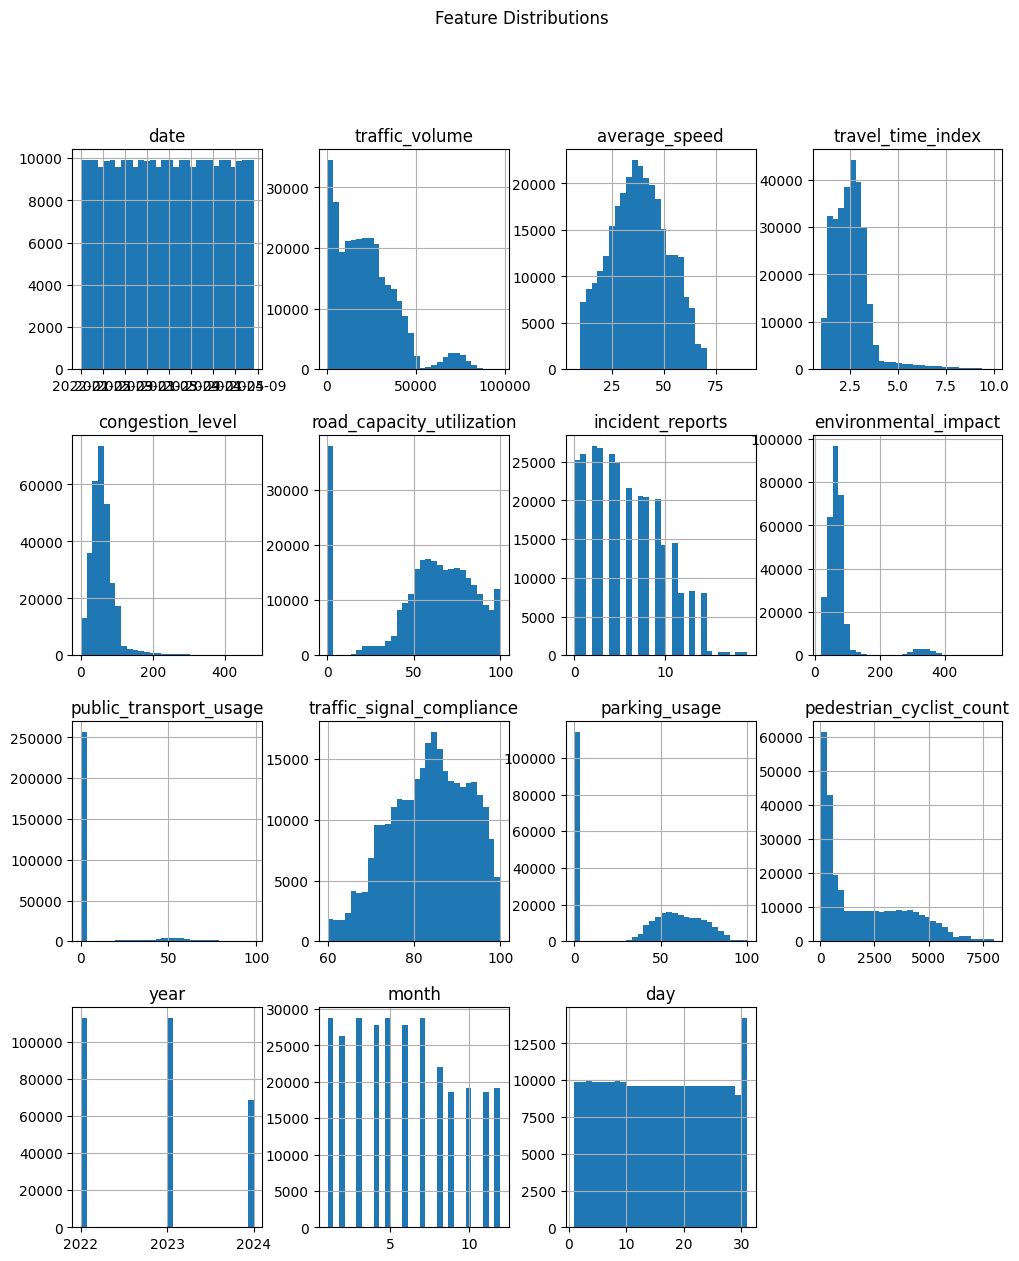

In [16]:
df.hist(figsize=(12, 14), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

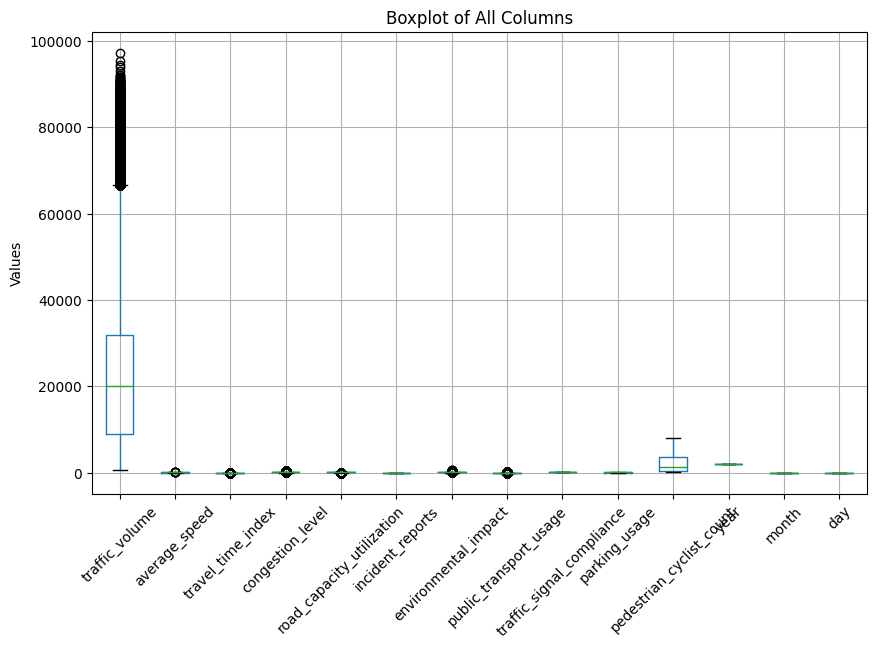

In [17]:
plt.figure(figsize=(10, 6)) 
df.boxplot()
plt.title("Boxplot of All Columns")
plt.xticks(rotation=45)  
plt.ylabel("Values")
plt.show()

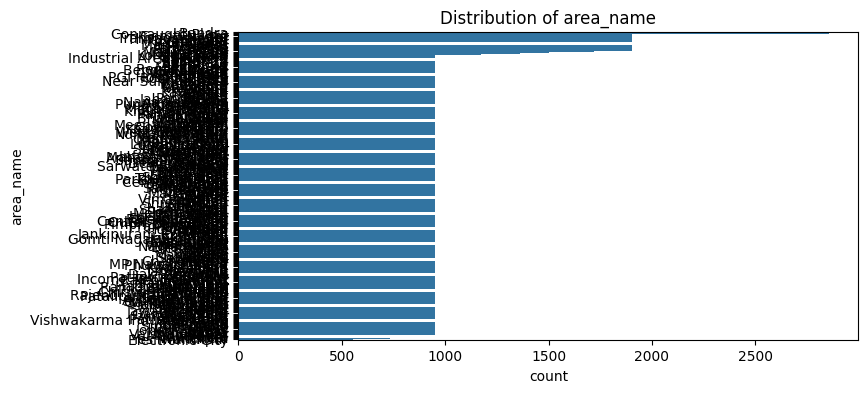

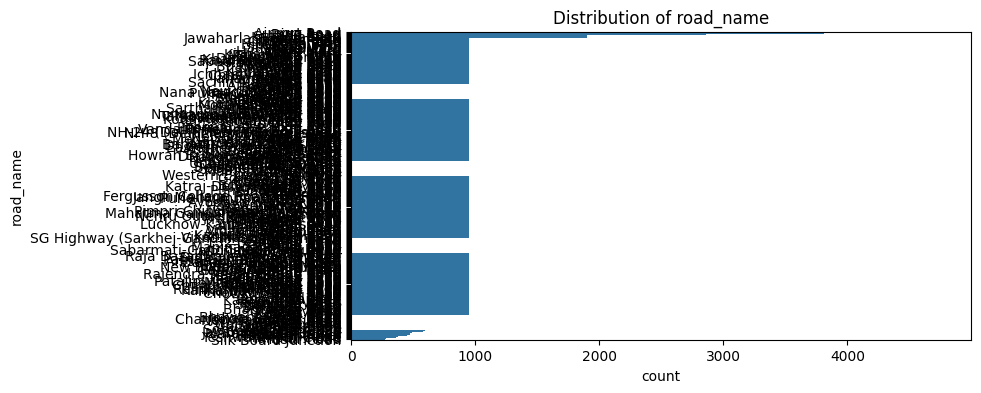

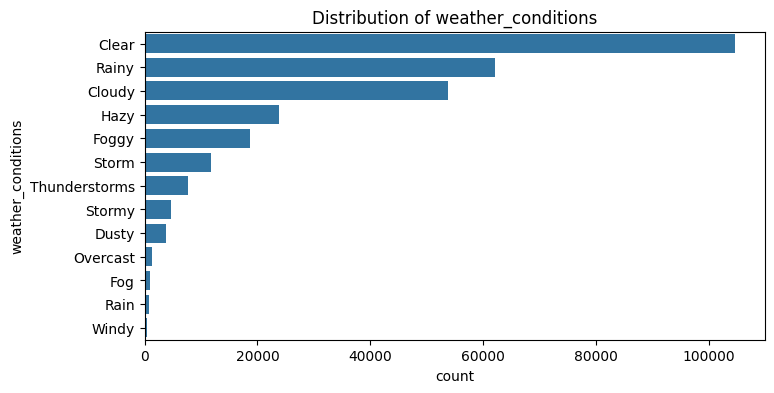

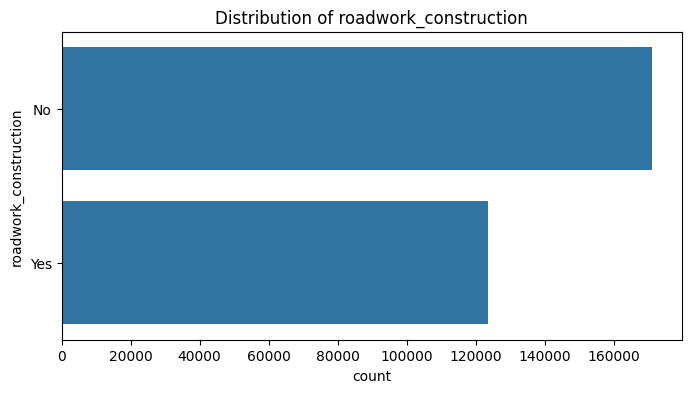

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns[:5]
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

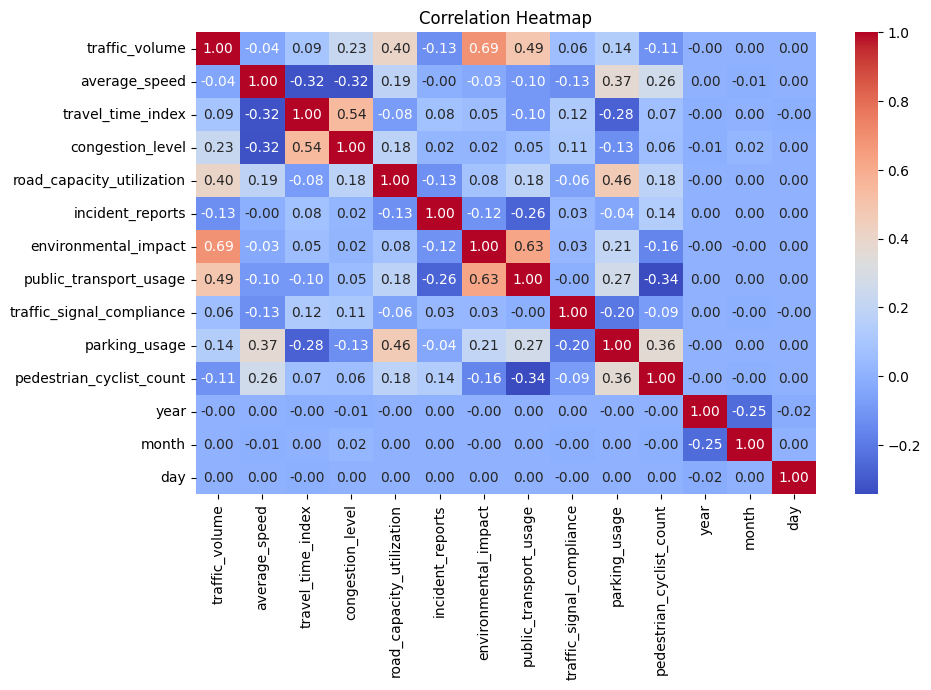

In [19]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 📌 Feature Engineering 

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.get_dummies(df, drop_first=True)  

In [22]:
df

,date,traffic_volume,average_speed,travel_time_index,congestion_level,road_capacity_utilization,incident_reports,environmental_impact,public_transport_usage,traffic_signal_compliance,...,weather_conditions_Foggy,weather_conditions_Hazy,weather_conditions_Overcast,weather_conditions_Rain,weather_conditions_Rainy,weather_conditions_Storm,weather_conditions_Stormy,weather_conditions_Thunderstorms,weather_conditions_Windy,roadwork_construction_Yes
0,2022-01-01,18823,25.399547,3.220000,52.727863,88.720000,7,72.870,0.570000,83.230000,...,0,0,0,0,1,0,0,0,0,0
1,2022-01-01,7083,38.866577,2.950000,48.715108,83.100000,6,84.590,0.520000,87.860000,...,0,1,0,0,0,0,0,0,0,0
2,2022-01-01,37933,57.681344,2.290000,62.929283,89.110000,7,65.470,0.490000,90.330000,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-01,38707,56.897932,2.880000,80.801755,53.370000,0,64.750,0.730000,82.630000,...,0,1,0,0,0,0,0,0,0,1
4,2022-01-01,9699,54.219556,2.530000,41.401158,80.780000,3,56.760,0.620000,94.670000,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294531,2024-08-09,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,...,0,0,0,0,0,0,0,0,0,0
294532,2024-08-09,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,...,0,0,0,0,0,0,0,0,0,0
294533,2024-08-09,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,...,0,0,0,0,0,0,0,0,0,0
294534,2024-08-09,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,...,0,0,0,0,0,0,0,0,0,0


In [23]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['number']).columns  
df[num_cols] = scaler.fit_transform(df[num_cols])

## 📌 Model Training

In [24]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

X = df.drop(columns=['congestion_level'])   
y = df['congestion_level']   

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X_train['date'] = pd.to_datetime(X_train['date'])  
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train['hour'] = X_train['date'].dt.hour
X_train = X_train.drop(columns=['date'])

In [26]:
X_test['date'] = pd.to_datetime(X_test['date']) 
X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test['hour'] = X_test['date'].dt.hour
X_test = X_test.drop(columns=['date'])

In [27]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [29]:
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)


lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_r2 = r2_score(y_test, lgb_pred)


cat_model = CatBoostRegressor(n_estimators=200, learning_rate=0.1, depth=6, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_r2 = r2_score(y_test, cat_pred)

print(f"XGBoost R² Score: {xgb_r2:.4f}")
print(f"LightGBM R² Score: {lgb_r2:.4f}")
print(f"CatBoost R² Score: {cat_r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.158509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4174
[LightGBM] [Info] Number of data points in the train set: 235628, number of used features: 616
[LightGBM] [Info] Start training from score -0.000195
XGBoost R² Score: 0.8727
LightGBM R² Score: 0.8706
CatBoost R² Score: 0.8679


In [30]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

categorical_cols = X_train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = X_test[col].map(lambda s: label_encoders[col].transform([s])[0] if s in label_encoders[col].classes_ else -1)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
X_train = X_train.drop(columns=['date'], errors='ignore')
X_test = X_test.drop(columns=['date'], errors='ignore')  
rfg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfg_model.fit(X_train, y_train)
y_pred = rfg_model.predict(X_test)

In [32]:
print("NaN values in y_test:", np.isnan(y_test).sum())
print("NaN values in y_pred:", np.isnan(y_pred).sum())

NaN values in y_test: 0
NaN values in y_pred: 0


In [33]:
X_test = X_test.fillna(0)  
X_test_clean = X_test.loc[y_test.index]

In [34]:
y_test.fillna(y_test.mean(), inplace=True)  

In [35]:
print(set(X_train.index) & set(X_test.index))

set()


In [36]:
mae = mean_absolute_error(y_test, y_pred[:len(y_test)])
mse = mean_squared_error(y_test, y_pred[:len(y_test)])
r2 = r2_score(y_test, y_pred[:len(y_test)])

print(f"Model Performance:\n MAE: {mae:.4f}\n MSE: {mse:.4f}\n R² Score: {r2:.4f}")


Model Performance:
 MAE: 0.2088
 MSE: 0.1164
 R² Score: 0.8869


## 📌 Exporting Models to Files

In [37]:
import joblib
joblib.dump(xgb_model , "xgb.pkl")
joblib.dump(lgb_model , "lgb.pkl")
joblib.dump(cat_model , "cat.pkl")
joblib.dump(rfg_model , "rfg.pkl")

['rfg.pkl']